# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | calvinia
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | sumbawa besar
Processing Record 5 of Set 1 | remire-montjoly
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | ardakan
Processing Record 9 of Set 1 | afaahiti
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | chivhu
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | papao
Processing Record 14 of Set 1 | pisco
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | huanggang
Processing Record 18 of Set 1 | mersa matruh
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | watsa
Processing Record 21 of Set 1 | port elizabet

Processing Record 41 of Set 4 | torghay
Processing Record 42 of Set 4 | grand gaube
Processing Record 43 of Set 4 | ghanzi
Processing Record 44 of Set 4 | val-d'or
Processing Record 45 of Set 4 | okha
Processing Record 46 of Set 4 | carinhanha
Processing Record 47 of Set 4 | gondal
Processing Record 48 of Set 4 | constitucion
Processing Record 49 of Set 4 | antsiranana
Processing Record 0 of Set 5 | susanville
Processing Record 1 of Set 5 | meadow lake
Processing Record 2 of Set 5 | kasongo-lunda
Processing Record 3 of Set 5 | hami
Processing Record 4 of Set 5 | okhotsk
Processing Record 5 of Set 5 | steszew
Processing Record 6 of Set 5 | altagracia de orituco
Processing Record 7 of Set 5 | mhlume
Processing Record 8 of Set 5 | vorgashor
Processing Record 9 of Set 5 | port moresby
Processing Record 10 of Set 5 | chernyshevskiy
Processing Record 11 of Set 5 | eyl
Processing Record 12 of Set 5 | titel
Processing Record 13 of Set 5 | birobidzhan
Processing Record 14 of Set 5 | mandalgovi


Processing Record 33 of Set 8 | jayapura
Processing Record 34 of Set 8 | bernardo de irigoyen
Processing Record 35 of Set 8 | sosnogorsk
Processing Record 36 of Set 8 | arochukwu
Processing Record 37 of Set 8 | galliano
Processing Record 38 of Set 8 | nuku'alofa
Processing Record 39 of Set 8 | tukrah
Processing Record 40 of Set 8 | orlu
Processing Record 41 of Set 8 | horn lake
Processing Record 42 of Set 8 | alliance
Processing Record 43 of Set 8 | rabaul
Processing Record 44 of Set 8 | moroni
Processing Record 45 of Set 8 | goz beida
Processing Record 46 of Set 8 | kavaratti
Processing Record 47 of Set 8 | imperatriz
Processing Record 48 of Set 8 | luderitz
Processing Record 49 of Set 8 | gadzhiyevo
Processing Record 0 of Set 9 | karratha
Processing Record 1 of Set 9 | marsh harbour
Processing Record 2 of Set 9 | lakhipur
Processing Record 3 of Set 9 | colombo
Processing Record 4 of Set 9 | puerto quijarro
Processing Record 5 of Set 9 | saint-pierre
Processing Record 6 of Set 9 | nan

Processing Record 23 of Set 12 | minzhu
Processing Record 24 of Set 12 | beaune
Processing Record 25 of Set 12 | havre
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,39.92,92,100,29.89,TF,1698198410
1,calvinia,-31.4707,19.7760,54.12,56,12,3.94,ZA,1698198410
2,sumbawa besar,-8.5000,117.4333,94.14,35,94,7.70,ID,1698198410
3,remire-montjoly,4.9167,-52.2667,82.44,83,20,2.30,GF,1698198411
4,bilibino,68.0546,166.4372,9.28,95,28,3.53,RU,1698198411


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,39.92,92,100,29.89,TF,1698198410
1,calvinia,-31.4707,19.7760,54.12,56,12,3.94,ZA,1698198410
2,sumbawa besar,-8.5000,117.4333,94.14,35,94,7.70,ID,1698198410
3,remire-montjoly,4.9167,-52.2667,82.44,83,20,2.30,GF,1698198411
4,bilibino,68.0546,166.4372,9.28,95,28,3.53,RU,1698198411


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

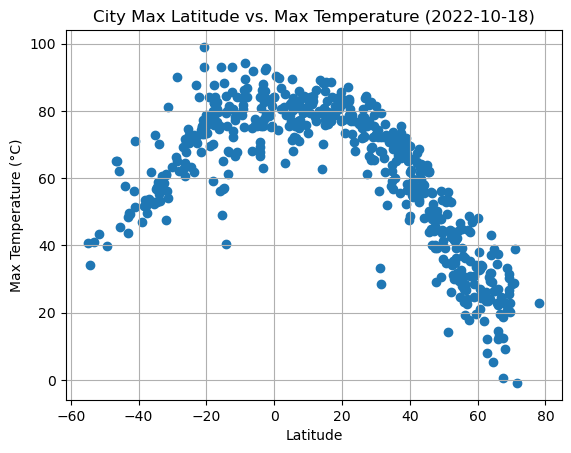

In [8]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)
plt.title('City Max Latitude vs. Max Temperature (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

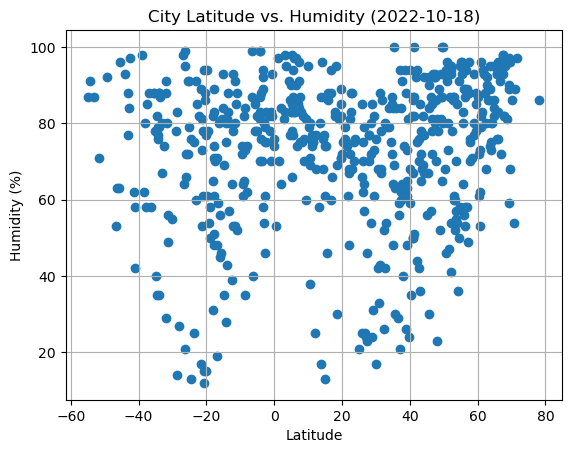

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.title('City Latitude vs. Humidity (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

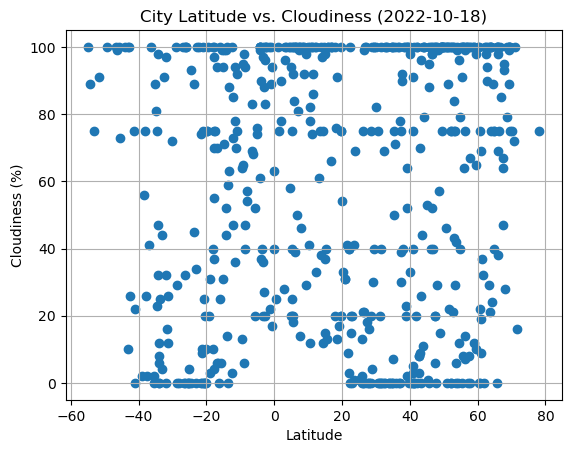

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.title('City Latitude vs. Cloudiness (2022-10-18)')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

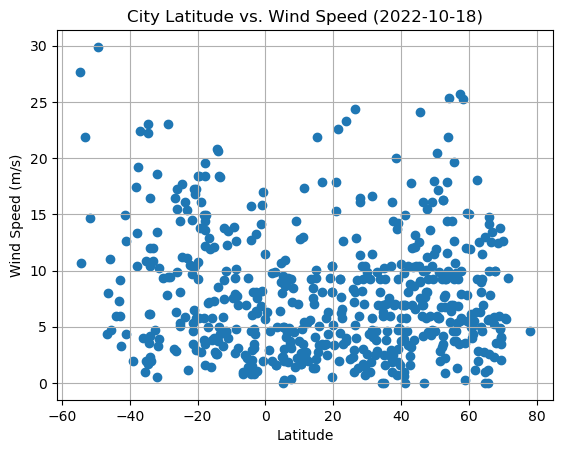

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.title('City Latitude vs. Wind Speed (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, x_label, y_label):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    print(f"The r-value is: {r_value}")
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.plot(x, intercept + slope*x, color='red')
    plt.annotate(equation, (min(x), max(y) - 20), fontsize=12, color='red')
    plt.grid(True)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,remire-montjoly,4.9167,-52.2667,82.44,83,20,2.30,GF,1698198411
4,bilibino,68.0546,166.4372,9.28,95,28,3.53,RU,1698198411
5,iqaluit,63.7506,-68.5145,31.73,74,100,8.05,CA,1698198411
6,ardakan,32.3100,54.0175,66.11,26,69,2.46,IR,1698198411
10,wailua homesteads,22.0669,-159.3780,82.83,68,40,9.22,US,1698198411


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,39.92,92,100,29.89,TF,1698198410
1,calvinia,-31.4707,19.7760,54.12,56,12,3.94,ZA,1698198410
2,sumbawa besar,-8.5000,117.4333,94.14,35,94,7.70,ID,1698198410
7,afaahiti,-17.7500,-149.2833,82.27,74,37,13.56,PF,1698198325
8,edinburgh of the seven seas,-37.0676,-12.3116,53.89,88,41,22.44,SH,1698198411


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9040094606958278


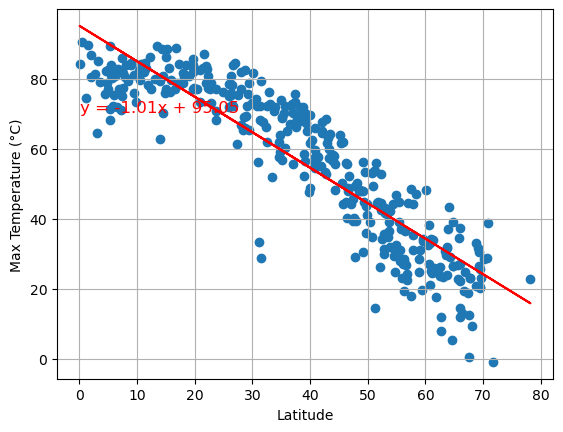

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (°C)')

The r-value is: 0.7205038915911456


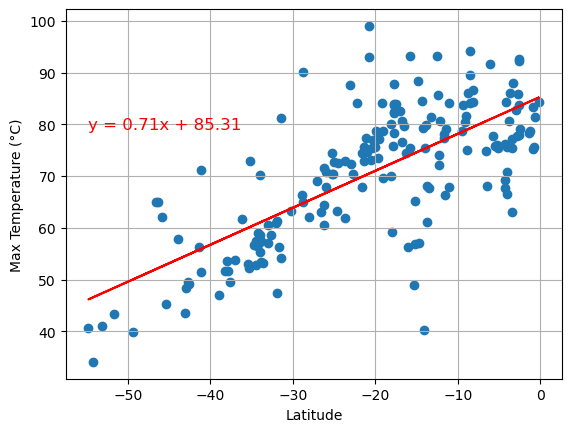

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (°C)')

**Discussion about the linear relationship:** The data shows a clear temperature-latitude relationship. In the Northern Hemisphere, there's a strong negative correlation, with temperatures dropping as you move north. In the Southern Hemisphere, there's a strong positive correlation, with temperatures rising as you move south. These patterns align with our understanding of how latitude affects temperature due to the Earth's tilt.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1348093033028162


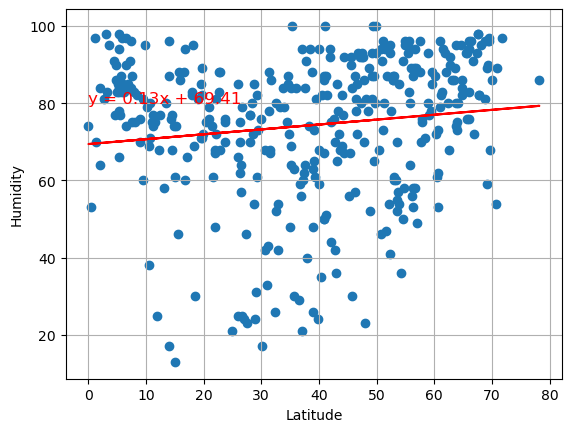

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r-value is: 0.0015270723341466322


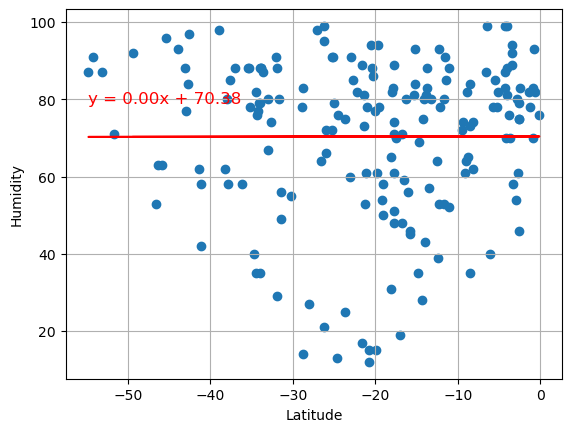

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** In both hemispheres, there is a weak relationship between humidity and latitude. In the Northern Hemisphere, humidity increases slightly as you move north (positive correlation), while in the Southern Hemisphere, it decreases slightly as you move south (negative correlation). However, these correlations are weak, indicating that latitude has a limited impact on humidity levels. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05095619032473173


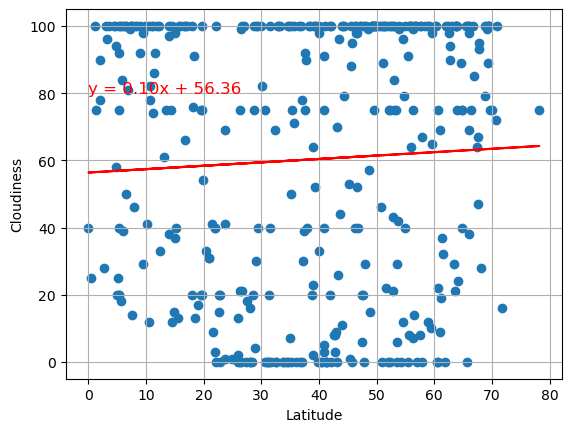

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is: 0.1302744649475876


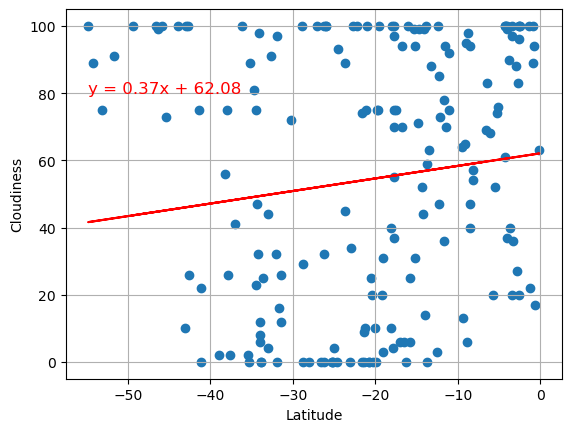

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** In both hemispheres, latitude has a minimal influence on cloudiness levels, as reflected by the weak correlations and small coefficients in the regression equations.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1398460861350542


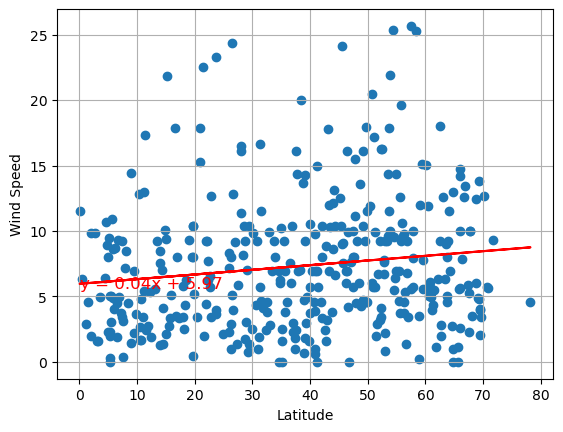

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is: -0.2539072218877677


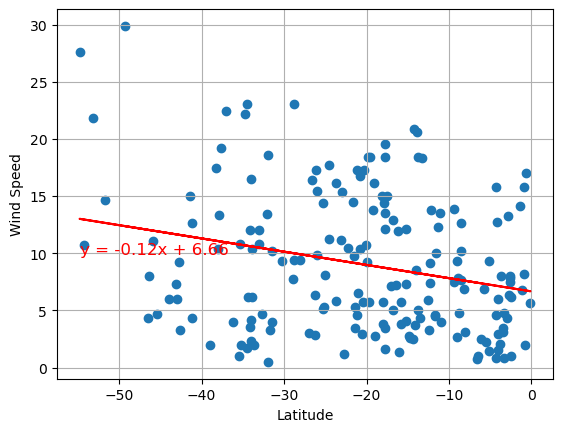

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** Overall, latitude has a limited impact on wind speed levels in both hemispheres, as shown by weak correlations and small coefficients in the regression equations. 